In [1]:
from src.model import VGG16Model
from src.train import train_model
from src.load_data import load_and_preprocess_data, prepare_train_test_data

c:\Users\asman\anaconda3\envs\myenv\lib\site-packages\requests\__init__.py:104: RequestsDependencyWarning: urllib3 (1.26.18) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  RequestsDependencyWarning)


In [11]:
from src.evaluate import evaluate_model

In [2]:
vgg16 = VGG16Model(input_shape=(100, 100, 3), num_classes=5)
vgg16.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0     

In [3]:
vgg16.compile_model()

In [ ]:
base_path = 'Desktop/Database'
dataset_folder = 'train'  
image_size = 100  
image_data, label_data, label_names = load_and_preprocess_data(base_path, dataset_folder, image_size=image_size)

Loading MCI: 100%|██████████| 8002/8002 [00:10<00:00, 779.03it/s] 


In [5]:
image_data.shape

(40077, 100, 100, 3)

In [6]:
test_size = 0.2  # 20% of data will be used for testing
random_state = 42 
X_train, X_test, Y_train, Y_test, label_names = prepare_train_test_data(image_data, label_data, test_size=test_size, random_state=random_state)

In [7]:
model_name = 'VGG16'
history = train_model(vgg16,X_train, Y_train, X_test, Y_test,model_name)

Epoch 1/50
3207/3207 [==============================] - 105s 30ms/step - loss: 3.2549 - auc: 0.8328 - val_loss: 3.2365 - val_auc: 0.8430
Epoch 2/50
3207/3207 [==============================] - 89s 28ms/step - loss: 2.6299 - auc: 0.8791 - val_loss: 4.5763 - val_auc: 0.8422
Epoch 3/50
3207/3207 [==============================] - 90s 28ms/step - loss: 2.4270 - auc: 0.8933 - val_loss: 3.5082 - val_auc: 0.8575
Epoch 4/50
3207/3207 [==============================] - 89s 28ms/step - loss: 2.3560 - auc: 0.9005 - val_loss: 2.7754 - val_auc: 0.8845
Epoch 5/50
3207/3207 [==============================] - 88s 28ms/step - loss: 2.2404 - auc: 0.9078 - val_loss: 2.9129 - val_auc: 0.8904
Epoch 6/50
3207/3207 [==============================] - 91s 28ms/step - loss: 2.2674 - auc: 0.9099 - val_loss: 2.7808 - val_auc: 0.8957
Epoch 7/50
3207/3207 [==============================] - 103s 32ms/step - loss: 2.1906 - auc: 0.9136 - val_loss: 2.6822 - val_auc: 0.8997
Epoch 8/50
3207/3207 [========================

In [8]:
loss, accuracy = vgg16.evaluate(X_train, Y_train)
print("Train Loss: ", loss)
print("Train Accuracy: ", accuracy)

1002/1002 [==============================] - 32s 30ms/step - loss: 1.5912 - auc: 0.9320
Train Loss:  1.5912327766418457
Train Accuracy:  0.9320071935653687


In [9]:
loss, accuracy = vgg16.evaluate(X_test, Y_test)
print("Test Loss: ", loss)
print("Test Accuracy: ", accuracy)

251/251 [==============================] - 8s 33ms/step - loss: 2.6823 - auc: 0.8996
Test Loss:  2.682326316833496
Test Accuracy:  0.8996460437774658


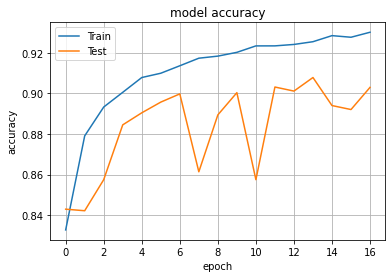

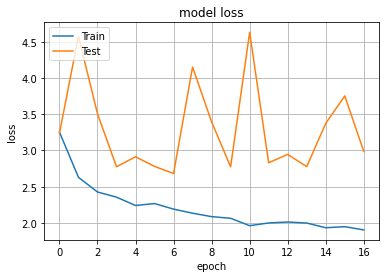

In [10]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.show()


              precision    recall  f1-score   support

           0       0.76      0.92      0.84      1653
           1       0.90      0.82      0.86      1612
           2       0.73      0.63      0.68      1588
           3       0.64      0.75      0.69      1552
           4       0.94      0.80      0.86      1611

    accuracy                           0.79      8016
   macro avg       0.79      0.78      0.78      8016
weighted avg       0.80      0.79      0.79      8016



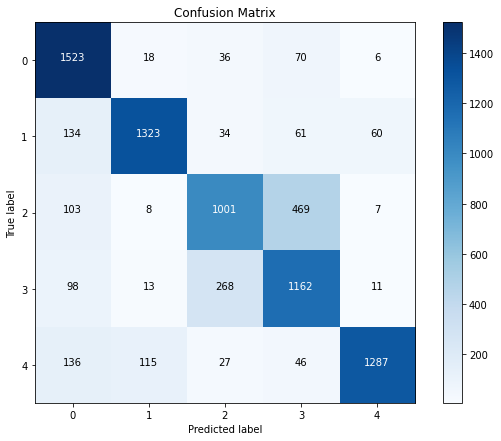

In [ ]:
evaluate_model(vgg16, X_test, Y_test)